Geo Data
Taken from
https://data.lacounty.gov/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about

In [52]:
# Load necessary libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rioxr


# Import the Landsat 8 data
fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc')
landsat = xr.open_dataset(fp)

In [39]:
# View the data variables in the dataset
print(landsat.variables)
print(landsat.data_vars)


Frozen({'y': <xarray.IndexVariable 'y' (y: 1418)> Size: 11kB
array([3799050., 3799020., 3798990., ..., 3756600., 3756570., 3756540.])
Attributes:
    units:          metre
    resolution:     -30.0
    crs:            EPSG:32611
    axis:           Y
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate, 'x': <xarray.IndexVariable 'x' (x: 2742)> Size: 22kB
array([334410., 334440., 334470., ..., 416580., 416610., 416640.])
Attributes:
    units:          metre
    resolution:     30.0
    crs:            EPSG:32611
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate, 'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]], 'red': <xarray.Variable (y: 1418, x: 2742)> Size: 16MB
[3888156 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'green': <xarray.Variable (y: 1418, x: 2742)> Size: 16MB
[3888156 values with dtype=float32]
Attributes:
    grid_mapp

In [ ]:
# Check the coordinate reference system (CRS) of the landsat data
print(landsat.rio.crs)

None


In [53]:
# Recover geometry information using CRS from the spatial_ref attribute
landsat.rio.write_crs(landsat.spatial_ref.crs_wkt, inplace=True)
print(landsat.rio.crs)

EPSG:32611


In [89]:
np.array([landsat.red, landsat.green, landsat.blue]).pd.Dataframe()

AttributeError: 'numpy.ndarray' object has no attribute 'pd'

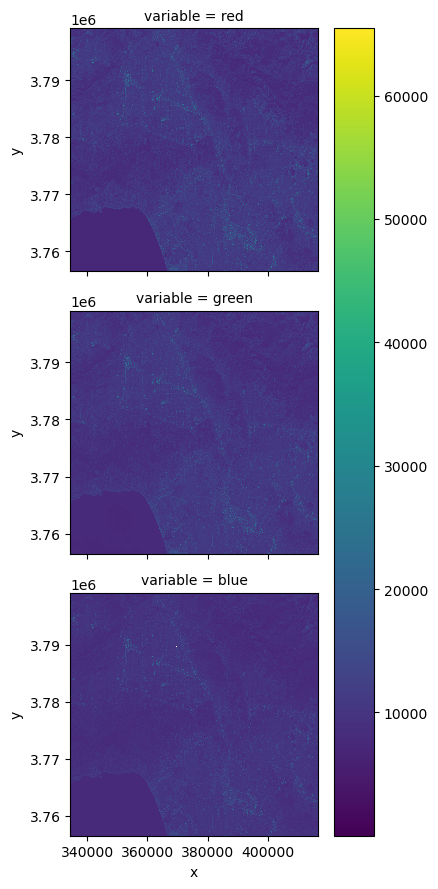

In [98]:
landsat[['red', 'green', 'blue']].to_array().plot.imshow(col='variable', col_wrap=1)